# Hotels in Amsterdam

## Will we need predicted probabilities? Wait for Monday TA session to see…
Will TA show us graph we need? (maybe histograms showing predicted probabilities v actual probabilities… wait for Monday TA session to see…

Probably will need to change:
- graphs to be histograms of predicted probabilities....
- need to include graphs in documentation, and OVERALL SUMMARY
- will need to copy/paste from another notbook here = to have multiple commits...

In [1]:
#importing libraries
import pandas as pd
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
#reading csv files
hotel_features = pd.read_csv('hotels-europe_features.csv')
hotel_prices = pd.read_csv('hotels-europe_price.csv')

In [3]:
#df1 where city is Amsterdam
df1 = pd.DataFrame(hotel_features)
df1 = df1.loc[df1['city'] == 'Amsterdam']

In [4]:
#seeing df2
df2 = pd.DataFrame(hotel_prices)
df2.head(3)

,hotel_id,price,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room
0,1,172,0,0% no offer,2017,11,1,0,1,0
1,1,122,1,15-50% offer,2018,1,1,0,1,0
2,1,122,1,15-50% offer,2017,12,0,1,1,0


In [5]:
#merging 2 dfs 
df = pd.merge(df1, df2, on = 'hotel_id')
df.head(3)

,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,...,accommodation_type,price,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room
0,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,Hotel,172,0,0% no offer,2017,11,1,0,1,0
1,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,Hotel,122,1,15-50% offer,2018,1,1,0,1,0
2,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,Hotel,122,1,15-50% offer,2017,12,0,1,1,0


In [8]:
#use hotel user ratings to create a binary variable: highly_rated=1 if rating ≥ 4, 0 otherwise 0 .
#Examine how high rating is related to the other hotel features in the data. Make sure to
#document and argue for the data cleaning/filtering decisions you make.
df.columns

Index(['hotel_id', 'city', 'distance', 'stars', 'rating', 'country',
       'city_actual', 'rating_reviewcount', 'center1label', 'center2label',
       'neighbourhood', 'ratingta', 'ratingta_count', 'distance_alter',
       'accommodation_type', 'price', 'offer', 'offer_cat', 'year', 'month',
       'weekend', 'holiday', 'nnights', 'scarce_room'],
      dtype='object')

In [7]:
#creating dummy variable
df['highly_rated'] = (df['rating'] >= 4).astype(int)
df = df.dropna(subset=['rating'])

In [9]:
df.highly_rated

0       1
1       1
2       1
3       1
4       1
       ..
2053    0
2054    0
2055    0
2056    0
2057    0
Name: highly_rated, Length: 2045, dtype: int64

In [27]:
df.head(3)

,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,...,price,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room,highly_rated
0,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,172,0,0% no offer,2017,11,1,0,1,0,1
1,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,122,1,15-50% offer,2018,1,1,0,1,0,1
2,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,122,1,15-50% offer,2017,12,0,1,1,0,1


## Linear Probability Model (LPM): `distance`

In [35]:
x_vars = sm.add_constant(df[['distance', 'stars']])
# Model LPM
model = sm.OLS(df['highly_rated'], x_vars)
# Fit the model
result = model.fit(cov_type = 'HC1')
# Print summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           highly_rated   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     1018.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          2.31e-307
Time:                        00:42:15   Log-Likelihood:                -1017.0
No. Observations:                2045   AIC:                             2040.
Df Residuals:                    2042   BIC:                             2057.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4371      0.025    -17.147      0.0

In [36]:
# Coefficients in LPM are not easily interpretable and do not have a direct relationship with probabilities. 
# They also have limitations as the coefficiens can fall out of the range of [0,1] which wouldn' make sense for 
# our dependent variable. This model also assumes linearity which is why it is better to use the logit or probit
# models. 

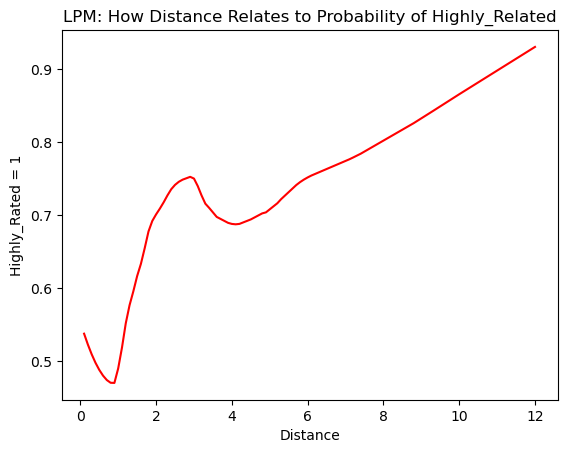

In [37]:
#Linear Probability Model (LPM) 
data_distance = lowess(df['highly_rated'], df['distance'])
# Plot the smoothed data
plt.plot(data_distance[:, 0], data_distance[:, 1], color='red', label='Distance')
plt.xlabel('Distance')
plt.ylabel('Highly_Rated = 1')
plt.title('LPM: How Distance Relates to Probability of Highly_Related')
plt.show()
#looks like as distance increases, ratings get higher???

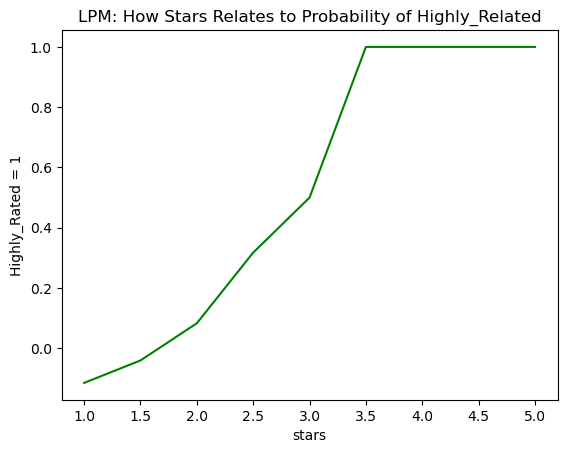

In [38]:
#Linear Probability Model (LPM) 
data_distance = lowess(df['highly_rated'], df['stars'])
# Plot the smoothed data
plt.plot(data_distance[:, 0], data_distance[:, 1], color='green', label='Distance')
plt.xlabel('stars')
plt.ylabel('Highly_Rated = 1')
plt.title('LPM: How Stars Relates to Probability of Highly_Related')
plt.show()
#looks like as stars increase, ratings get higher

In [50]:
#Logit Regression Results (table)
#x_variable + covariate
x_vars = df[['distance', 'stars']]
#adding intercept/constant
x_vars = sm.add_constant(x_vars)
#modeling Logit
model = sm.Logit(df['highly_rated'], x_vars)
#robust SE 
result = model.fit(cov_type = 'HC1')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.472526
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           highly_rated   No. Observations:                 2045
Model:                          Logit   Df Residuals:                     2042
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.3038
Time:                        01:00:18   Log-Likelihood:                -966.32
converged:                       True   LL-Null:                       -1387.9
Covariance Type:                  HC1   LLR p-value:                8.069e-184
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7932      0.291    -19.910      0.000      -6.363      -5.223
distance       0.1466      0.

Logit Regression Model coefficients are not very informative as they represent log-odds. We need marginal differences in order to make sense of our model.

In [51]:
marginal_effects = result.get_margeff()

# Print marginal effects summary
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:           highly_rated
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.0227      0.004      5.657      0.000       0.015       0.031
stars          0.2742      0.007     39.702      0.000       0.261       0.288


-for one unit increase in distance, there is a 0.0226 increase in the probability of hotel being highly_rated. p value is 0 (or near 0) meaning `distance` is statistically significant (most likely a relationship between distance and probability of a hotel being highly_rated (having more than 4 stars)).

-for one unit increase in stars, there is a 0.2742 increase in the probability of hotel being highly_rated. p value is 0 (or near 0) meaning `stars` is statistically significant (most likely a relationship between stars and probability of a hotel being highly_rated (having more than 4 stars)).


In [52]:
predicted_probabilities = result.predict(x_vars)
predicted_probabilities.mean()
#predicted probability is around 0.5 = it indicates uncertainty or ambiguity in predicting the outcome.

0.5848410757946211

In [32]:
#Probit
#x_variable + covariate
x_vars = df[['distance', 'stars']]
#adding intercept/constant
x_vars = sm.add_constant(x_vars)
#modeling Logit
model = sm.Probit(df['highly_rated'], x_vars)
#robust SE 
result = model.fit(cov_type = 'HC1')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.473366
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:           highly_rated   No. Observations:                 2045
Model:                         Probit   Df Residuals:                     2042
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.3025
Time:                        00:41:17   Log-Likelihood:                -968.03
converged:                       True   LL-Null:                       -1387.9
Covariance Type:                  HC1   LLR p-value:                4.501e-183
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3423      0.158    -21.117      0.000      -3.652      -3.032
distance       0.0788      0.

In [33]:
marginal_effects = result.get_margeff()

# Print marginal effects summary
print(marginal_effects.summary())

       Probit Marginal Effects       
Dep. Variable:           highly_rated
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.0211      0.004      5.425      0.000       0.013       0.029
stars          0.2742      0.007     40.272      0.000       0.261       0.288


-for one unit increase in distance, there is a 0.0210 increase in the probability of hotel being highly_rated. p value is 0 (or near 0) meaning `distance` is statistically significant (most likely a relationship between distance and probability of a hotel being highly_rated (having more than 4 stars)).

-for one unit increase in stars, there is a 0.2742 increase in the probability of hotel being highly_rated. p value is 0 (or near 0) meaning `stars` is statistically significant (most likely a relationship between stars and probability of a hotel being highly_rated (having more than 4 stars)).


In [34]:
predicted_probabilities = result.predict(x_vars)
predicted_probabilities.mean()
#predicted probability is around 0.5 = it indicates uncertainty or ambiguity in predicting the outcome.

0.5849936475709